# **CS 166 Elevator Simulation**
Anirudh Nair, Yanal Marji, Danyal Naeem, Steven Tey


link to project: https://colab.research.google.com/drive/1KJD1-laAyJxX20eGHPHmUqtibtoZzT2F#scrollTo=U3ih1Ay2ipg6

## **Elevator Stategy 1 and 2**
The team has mainly come up with three strategies (two of them very similar). The first two  stratagies are basically a simplified version of the example strategy. In the first one, the elevator first goes to the top floor and then goes down one by one depending on which floors have passenger requests and which floors are the passengers' target floors. It then picks up and drops passengers based on these requests till it reaches the first floor, and then repeats the whole proccess. The second strategy is very similar to the first one, the difference being that it goes up one by one based on the floors that have passenger requests and are passengers' target floors. Once it reaches the top floor, it comes all the way down and repeats the process.


## **Elevator Stategy 3**
The third strategy is known as the one shot strategy in which the elevator serves thr requests passenger by passenger. So basically, it takes in a passenger and then goes to the target floor of that elevator and repeats this process for each passenger in the passenger request list. 

## **Efficiency Measure**
For the purpose of the assignment, I have taken the perspective of the elevator and thus am considering the number of steps that the elevator takes to be the measure of efficiency. Thus, given the three strategies, my aim is to plot the average amount of steps the elevator travels against the number of people the elevator aims to serve. This measure of efficiency has been chosen taking into consideration the amount of energy consumption that will occur for different strategies. Thus, through this analysis, we will be able to understand which stratergy would be the best so as to use minimal amount of enery so that the elevator can be energy efficient and reduce its carbon footprint on the world.

Thus for each of the simulations, I run a simulation to run the elevator a 100 times and measure the amount of steps the elevator takes to serve from 1 upto 100 passengers.

# Elevator Strategy **1**

### **Classes**

In [0]:
import random

class Elevator(object):
    """docstring for Elevator"""
    def __init__(self, max_floor, max_capacity = 10, current_floor = 0, target_floor = 0, direction = 1):
        self.current_floor  = current_floor
        self.target_floor =  target_floor
        self.direction = direction
        self.max_floor = max_floor
        self.max_capacity = max_capacity
        self.passenger_list = []
        self.wait_times = []
        self.completed_floors = [0]

    def desired_floor(self):
        if self.direction == 1:
            self.target_floor = self.max_floor
            self.direction = -1

        elif self.direction == -1:
            if self.current_floor == 1:
                self.direction = 1
                self.target_floor = self.max_floor
            else:
                self.target_floor = self.current_floor-1

    def run(self, building):
        self.current_floor = self.target_floor
        for i in building.floor_storage:
            for passenger in i:
                passenger.wait_time += 1

        self.completed_floors.append(self.current_floor)

    def add_passenger(self, building):
        while len(self.passenger_list)< self.max_capacity and len(building.floor_storage[self.current_floor-1])> 0:
            self.passenger_list.append(building.floor_storage[self.current_floor-1][0])
            building.floor_storage[self.current_floor-1].remove(building.floor_storage[self.current_floor-1][0])
            print("Passenger added to the elevator")

    def remove_passenger(self):
        for passenger in self.passenger_list:
            if passenger.tgt_floor == self.current_floor:
                self.wait_times.append(passenger.wait_time)
                self.passenger_list.remove(passenger)
                print("Passenger removed from the elevator")
            

    def initialize(self, building):
        while self.passenger_list != [] or building.request_floors != []:
            self.desired_floor()
            self.run(building)
            self.remove_passenger()
            self.add_passenger(building)
            if len(self.passenger_list) == 0:
                print("The elevator did it's job !")
                break
                


class Building(object):
            """docstring for building"""
            def __init__(self,max_floor, pass_count, request_floors = []):
                self.max_floor = max_floor
                self.pass_count= pass_count
                self.request_floors = request_floors
                self.floor_storage = [[] for i in range(self.max_floor)]

            def populate_floor(self):
                passenger = Passenger(self.max_floor)
                floor = random.randint(1, self.max_floor)

                while floor == passenger.tgt_floor:
                    floor = random.randint(1,self.max_floor)

                self.floor_storage[floor-1].append(passenger)
                print("Passenger Initiated")

            def requests(self):
                for i in range(0,len(self.floor_storage)):
                    if len(self.floor_storage[i])>0:
                        self.request_floors.append(i+1)

            def initialize(self):
                for i in range(0,self.pass_count):
                    self.populate_floor()
                    self.requests()


class Passenger(object):
    """docstring for Passenger"""
    def __init__(self, max_floor, tgt_floor = 0 , wait_time=0):
        self.max_floor = max_floor
        self.tgt_floor = random.randint(1, self.max_floor)
        self.wait_time = wait_time 
        
    def __repr__(self):
        return "Passenger's desired floor is " + str(self.tgt_floor) 


### **Simulation**

In [3]:
Pass_Count = int(input("How many passengers are in the building?: "))
Floor_Count = int(input("How many floors does the building have?: "))
building = Building(Floor_Count, Pass_Count)
building.initialize()
elevator = Elevator(Floor_Count)
elevator.initialize(building)

How many passengers are in the building?: 40
How many floors does the building have?: 20
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger added to the elevator
Passenger added to the elevator
Passenger removed from the elevator
Passenger a

Visualizations

In [4]:
StorageList = []
for i in range(1,100):
    Pass_Count = i
    Floor_Count = 20
    building = Building(Floor_Count, Pass_Count)
    building.initialize()
    elevator = Elevator(Floor_Count)
    elevator.initialize(building)
    StorageList.append(sum(elevator.wait_times)/i)

Passenger Initiated
The elevator did it's job !
Passenger Initiated
Passenger Initiated
The elevator did it's job !
Passenger Initiated
Passenger Initiated
Passenger Initiated
The elevator did it's job !
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
The elevator did it's job !
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
The elevator did it's job !
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
The elevator did it's job !
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
The elevator did it's job !
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
Passenger Initiated
The elevator did it's job !
Passenger Initiated
Passenger Initiated
Passenger Initia

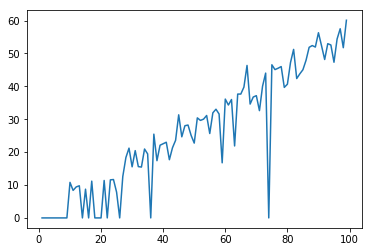

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(1,100), StorageList)

# **Elevator Strategy 2**

### **Classes**

In [0]:
import random

class Elevator2(object):
    """docstring for Elevator"""
    def __init__(self, max_floor, max_capacity = 10, current_floor = 0, target_floor = 0, direction = 1):
        self.current_floor  = current_floor
        self.target_floor =  target_floor
        self.direction = direction
        self.max_floor = max_floor
        self.max_capacity = max_capacity
        self.passenger_list = []
        self.wait_times = []
        self.completed_floors = [0]

    def desired_floor(self):
        if self.direction == -1:
            self.target_floor = 1
            self.direction = 1

        elif self.direction == 1:
            if self.current_floor == self.max_floor:
                self.direction = -1
                self.target_floor = 1
            else:
                self.target_floor = self.current_floor+1

    def run(self, building):
        self.current_floor = self.target_floor
        for i in building.floor_storage:
            for passenger in i:
                passenger.wait_time += 1

        self.completed_floors.append(self.current_floor)

    def add_passenger(self, building):
        while len(self.passenger_list)< self.max_capacity and len(building.floor_storage[self.current_floor-1])> 0:
            self.passenger_list.append(building.floor_storage[self.current_floor-1][0])
            building.floor_storage[self.current_floor-1].remove(building.floor_storage[self.current_floor-1][0])
            print("Passenger added to the elevator")

    def remove_passenger(self):
        for passenger in self.passenger_list:
            if passenger.tgt_floor == self.current_floor:
                self.wait_times.append(passenger.wait_time)
                self.passenger_list.remove(passenger)
                print("Passenger removed from the elevator")
            

    def initialize(self, building):
        while self.passenger_list != [] or building.request_floors != []:
            self.desired_floor()
            self.run(building)
            self.remove_passenger()
            self.add_passenger(building)
            if len(self.passenger_list) == 0:
                print("The elevator did it's job !")
                break
                


class Building2(object):
            """docstring for building"""
            def __init__(self,max_floor, pass_count, request_floors = []):
                self.max_floor = max_floor
                self.pass_count= pass_count
                self.request_floors = request_floors
                self.floor_storage = [[] for i in range(self.max_floor)]

            def populate_floor(self):
                passenger = Passenger(self.max_floor)
                floor = random.randint(1, self.max_floor)

                while floor == passenger.tgt_floor:
                    floor = random.randint(1,self.max_floor)

                self.floor_storage[floor-1].append(passenger)
                print("Passenger Initiated")

            def requests(self):
                for i in range(0,len(self.floor_storage)):
                    if len(self.floor_storage[i])>0:
                        self.request_floors.append(i+1)

            def initialize(self):
                for i in range(0,self.pass_count):
                    self.populate_floor()
                    self.requests()


class Passenger2(object):
    """docstring for Passenger"""
    def __init__(self, max_floor, tgt_floor = 0 , wait_time=0):
        self.max_floor = max_floor
        self.tgt_floor = random.randint(1, self.max_floor)
        self.wait_time = wait_time 
        
    def __repr__(self):
        return "Passenger's desired floor is " + str(self.tgt_floor) 


### **Simulation**

In [23]:
Pass_Count = int(input("How many passengers are in the building?: "))
Floor_Count = int(input("How many floors does the building have?: "))
building2 = Building2(Floor_Count, Pass_Count)
building2.initialize()
elevator2 = Elevator2(Floor_Count)
elevator2.initialize(building2)

How many passengers are in the building?: 40
How many floors does the building have?: 20


TypeError: ignored

### **Visualizations**

In [16]:
StorageList2 = []
for i in range(1,200):
    Pass_Count = i
    Floor_Count = 20
    building2 = Building2(Floor_Count, Pass_Count)
    building2.initialize()
    elevator2 = Elevator2(Floor_Count)
    elevator2.initialize(building2)
    StorageList2.append(sum(elevator2.wait_times)/i)

TypeError: ignored

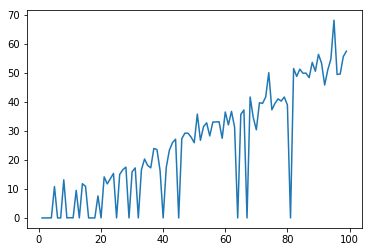

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(1,100), StorageList2)

# **Elevator Stategy 3**

### **Classes**

In [0]:
import numpy as np  #Importing Libraries
import random
import matplotlib.pyplot as plt
import matplotlib.style as style
class Elevator:
    def __init__(self, Building, DesiredFloor = 0, PassengerNumber = 0):
        self.CurrentFloor = random.randint(Building.MinFloor,Building.MaxFloor)
        self.DesiredFloor = DesiredFloor
        self.DesiredFloor2 = 0
        self.PassengerNumber = 0
        self.Counter = []
    
    def FindMin(self, Passenger):
        MinList=[]
        for i in Passenger[1:,1]:
            MinList.append(abs(i-self.CurrentFloor)) #Appending differences with each passenger location
        Minimum = min(MinList) #Finding the minimum
        index=MinList.index(Minimum) #Finding the index associated with that minimum
        self.DesiredFloor=Passenger[index,1]  #Setting the desired floor to pick up the passenger
        self.DesiredFloor2 = Passenger[index,2] #Setting the desired floor to drop off the passenger
        Passenger = np.delete(Passenger, index, 0) #removing the passenger from the pool of possible pick-ups.
        return(Passenger)

    def MoveToPassenger(self, Passenger, Building):
        if self.CurrentFloor - self.DesiredFloor < 0: #If direction is positive
            while self.CurrentFloor<self.DesiredFloor and self.CurrentFloor < Building.MaxFloor:
                    self.CurrentFloor+=1 #Keep increasing the current floor until you reach the passenger (or max floor).
                    self.Counter.append(1)
                    
        elif self.CurrentFloor - self.DesiredFloor > 0:
            while self.CurrentFloor>self.DesiredFloor and self.CurrentFloor > Building.MinFloor:
                self.CurrentFloor-=1
                self.Counter.append(1)
        
    def AddPassenger(self,Passenger):
        self.PassengerNumber = 1

    def MoveToLocation(self, Building):
        if self.CurrentFloor - self.DesiredFloor2 < 0:
            while self.CurrentFloor<self.DesiredFloor2 and self.CurrentFloor < Building.MaxFloor:
                self.CurrentFloor+=1
                self.Counter.append(1)
    
        elif self.CurrentFloor - self.DesiredFloor2 >0:
            while self.CurrentFloor>self.DesiredFloor2 and self.CurrentFloor > Building.MinFloor:
                self.CurrentFloor-=1
                self.Counter.append(1)
        
    def DeliverPassenger(self):
        if self.CurrentFloor==self.DesiredFloor2:
            self.PassengerNumber=0
                    
        
    def Run(self, Passenger, Building):
        for i in range(len(Passenger[1:,:])):
            Passenger = self.FindMin(Passenger)
            self.MoveToPassenger(Passenger, Building)
            self.AddPassenger(Passenger)
            self.MoveToLocation(Building)
            self.DeliverPassenger()
            
class Building:
    def __init__(self, MaxFloor, MinFloor):
        self.MaxFloor = MaxFloor
        self.MinFloor = MinFloor
        
class Passenger:
    def __init__(self, CurrentFloor, DesiredFloor):
        self.CurrentFloor = CurrentFloor
        self.DesiredFloor = DesiredFloor

### **Simulation**

In [0]:
def Simulation2(n,m):
    CountStorage = [] #an empty list to store the counters from the simulation
    for i in range(n):
        PassengerList = [] #List to store the passenger classes
        for i in range(m):
            PassengerList.append(Passenger(random.randint(0,20),random.randint(0,20))) #Append passenger classes
        PassengerList                                                     #With randomized current and desired drop offs.
        PassengerArray = np.array([0,0,0],ndmin=2) #Now, we append the information in an array for easier access.
        for i in PassengerList:
            PassengerArray = np.vstack([PassengerArray, [i, i.CurrentFloor, i.DesiredFloor]]) #Stack information in array.

        for i in PassengerArray[1:,2]:  #This loop deletes any row where the passenger's current floor is equal to their
            if PassengerArray[i,1] == PassengerArray[i,2]:  #Desired drop off.
                PassengerArrayFinal = np.delete(PassengerArray,i,0)
                
        Building1 = Building(20, 0) #Generate a building object with 20 floors (from 0 to 20)
        Elevator1 = Elevator(Building1) #Generate the elevator object
        Elevator1.Run(PassengerArray, Building1) #Run the simulation
        CountStorage.append(Elevator1.Counter.count(1)) #Store the counts
        
        Average = (sum(CountStorage)/n) #Compute the average count per simulation.
    return Average

AverageData1 = [] #Repeat the simulation 100 times, varying the number of passengers from 20 to 200 each time.
for j in range(20,200):
    AverageData1.append(Simulation2(100,j))

### **Visualizations**

Text(0, 0.5, 'Average Steps Taken by Elevator')

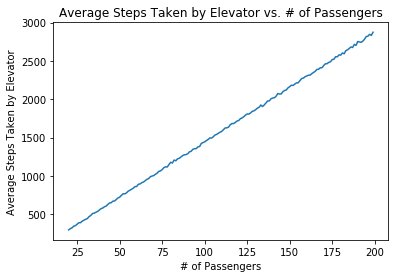

In [13]:
plt.plot(range(20,200), AverageData1)
plt.title('Average Steps Taken by Elevator vs. # of Passengers')
plt.xlabel('# of Passengers')
plt.ylabel('Average Steps Taken by Elevator')

Through the efficiency results, we can see the first two strategies take much less steps to serve 100 passengers than is taken by the 3rd stratergy, and the amount of difference is massive!

# **Contributions**

For the assignment, the first two strategies were mostly coded and executed by me, while the 3rd strategy was mostly coded and executed by Yanal. Danyal was able to help me in the ideation process and gave important insights, while also learning how to perform better at python. Steven also tried to contribute and gave ideas for choosing different measures of efficiency.


I learned a lot of python simulations through this assignment as I was forced to use OOP to create a simulation and had to go through a ton of tutorials and github repos to learn and execute my vision. I was able to properly practive inheritance, and make the classes interact with each other.